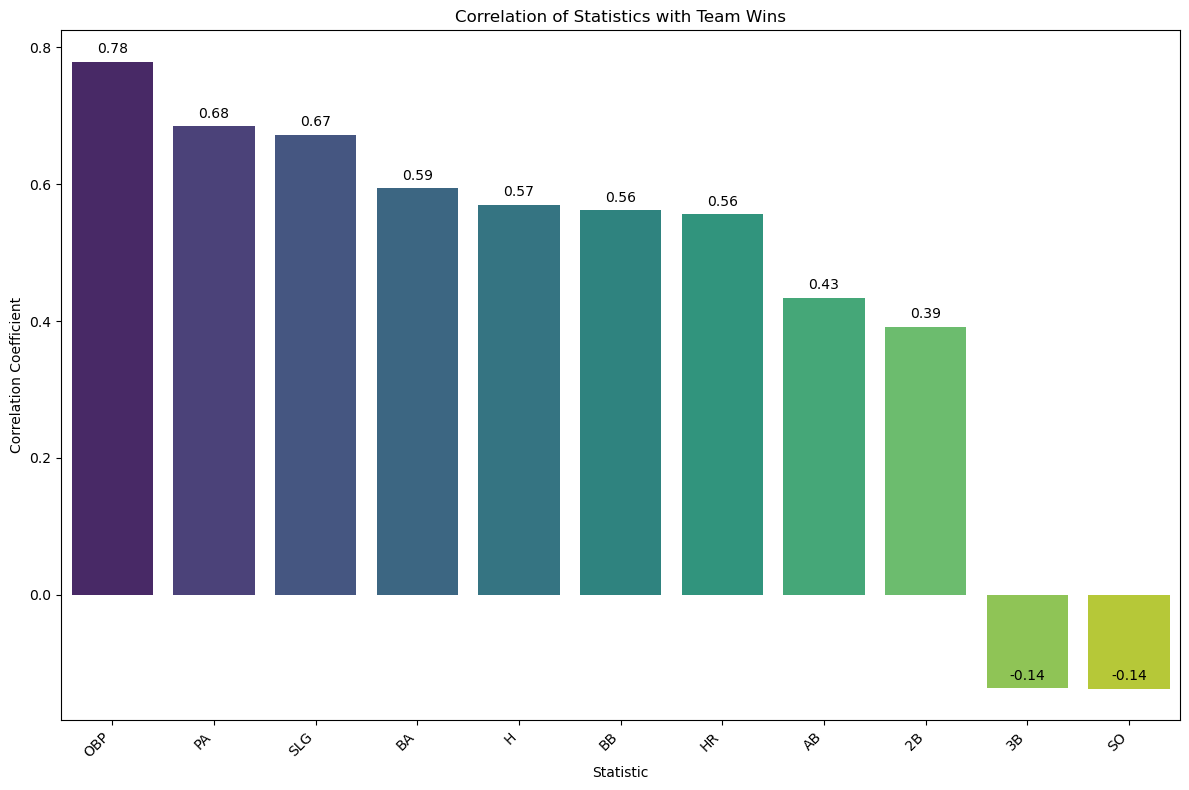

Statistically Significant Correlations (p < 0.05):
   Statistic  Correlation       P-Value
9        OBP     0.778801  4.007335e-07
0         PA     0.684293  3.046976e-05
10       SLG     0.672263  4.725182e-05
8         BA     0.593811  5.414977e-04
2          H     0.569636  1.017259e-03
6         BB     0.561782  1.235814e-03
5         HR     0.556188  1.415466e-03
1         AB     0.434006  1.656393e-02
3         2B     0.391541  3.237933e-02


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the Excel file
file_path = 'mlb2023.xlsx'
data = pd.read_excel(file_path)

# Calculate correlations and test statistical significance
correlations = {}
p_values = {}

for column in data.columns:
    if column != 'Team' and column != 'Wins':
        corr, p_val = pearsonr(data['Wins'], data[column])
        correlations[column] = corr
        p_values[column] = p_val

# Create a DataFrame for the correlations and p-values
correlation_df = pd.DataFrame({
    'Statistic': correlations.keys(),
    'Correlation': correlations.values(),
    'P-Value': p_values.values()
})

# Sort the DataFrame by correlation values
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=correlation_df, x='Statistic', y='Correlation', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Statistics with Team Wins')
plt.xlabel('Statistic')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.show()

# Highlight statistically significant correlations
significant_df = correlation_df[correlation_df['P-Value'] < 0.05]

# Print the significant correlations
print("Statistically Significant Correlations (p < 0.05):")
print(significant_df)
